In [ ]:
!pip install transformers==4.0.0
!pip install datasets
!pip install xmltodict 
!pip install torch==1.6.0
!pip install sklearn
!pip install tqdm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 748.8 MB 17 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires torch==1.12.1, but you have torch 1.6.0 which is incompatible.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.6.0 which is incompatible.
torchaudio 0.12.

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xmltodict
import datasets
from datasets import Dataset, concatenate_datasets
import glob
import pandas as pd
import torch
import transformers 

In [ ]:
#!/usr/bin/env python
import xmltodict
import datasets
from datasets import Dataset, concatenate_datasets
import glob
import pandas as pd
import re



dataframe_list = []
#for file in glob.glob("/content/drive/MyDrive/all_earnings_sub/*.xml"):
for file in glob.glob("/content/drive/MyDrive/original_pubmed/*.xml"):
  #print(file)
  with open(file, 'r', encoding='utf-8') as file: #'pubmed_1_copy.xml'
      my_xml = file.read()
      clean_xml = re.sub("[&;]","",my_xml)
      xml_dict = xmltodict.parse(my_xml)
      df1 = pd.DataFrame(xml_dict, columns=xml_dict.keys())
      order_dict = df1["rst"].iloc[0]
      segments_list_of_dicts = order_dict["segment"]
      xml_dataframe = pd.DataFrame.from_dict(segments_list_of_dicts, orient='columns')
      selected_df = xml_dataframe[~xml_dataframe.isnull().any(axis=1)] #removes null
      selected_df.sort_values(by='@id',ascending=True)
      #print(selected_df.head(10))
      #df1['Score_diff'] = df1['score1'] - df1['score2']
      selected_df["@id"] = selected_df["@id"].astype(float)
      selected_df["@parent"] = selected_df["@parent"].astype(float)

      selected_df["edu_distance"] = abs(selected_df["@id"] - selected_df["@parent"])
      df_formatted = selected_df.assign(parent_text=selected_df["#text"].shift(1))
      df_formatted["parent_text"].fillna(value=df_formatted.iloc[0]["#text"],inplace=True) #fillna parent
      df_formatted["parent_text"].fillna(value="Introduction",inplace=True) #fillna parent
      dataframe_list.append(df_formatted)
      all_pubmed_sub_df = pd.concat(dataframe_list)
    
#selected_df.groupby('a').count()
#print(all_earnings_df.head(15))
#print(len(all_pubmed_sub_df))
print(len(all_pubmed_sub_df["edu_distance"]))
print(len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 1]))
#.value_counts()

print(len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 1]) / len(all_pubmed_sub_df["edu_distance"]))
print(len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 3]) / len(all_pubmed_sub_df["edu_distance"]))
print(len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 5]) / len(all_pubmed_sub_df["edu_distance"]))
print(len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 10]) / len(all_pubmed_sub_df["edu_distance"]))
print(len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 15]) / len(all_pubmed_sub_df["edu_distance"]))
print(len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 20]) / len(all_pubmed_sub_df["edu_distance"]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

922
212
0.2299349240780911
0.20715835140997832
0.18655097613882862
0.12472885032537961
0.07266811279826464
0.04772234273318872


In [ ]:
#!/usr/bin/env python
import datasets
from datasets import Dataset, concatenate_datasets
import glob
import pandas as pd
import re
import transformers 
import xmltodict



dataframe_list = []
for file in glob.glob("/content/drive/MyDrive/all_earnings_sub/*.xml"):
#for file in glob.glob("/content/drive/MyDrive/original_pubmed/*.xml"):
  #print(file)
  with open(file, 'r', encoding='utf-8') as file: #'pubmed_1_copy.xml'
      my_xml = file.read()
      clean_xml = re.sub("[&;]","",my_xml)
      xml_dict = xmltodict.parse(my_xml)
      df1 = pd.DataFrame(xml_dict, columns=xml_dict.keys())
      order_dict = df1["rst"].iloc[0]
      segments_list_of_dicts = order_dict["segment"]
      xml_dataframe = pd.DataFrame.from_dict(segments_list_of_dicts, orient='columns')
      selected_df = xml_dataframe[~xml_dataframe.isnull().any(axis=1)] #removes null
      selected_df.sort_values(by='@id',ascending=True)
      #print(selected_df.head(10))
      #df1['Score_diff'] = df1['score1'] - df1['score2']
      selected_df["@id"] = selected_df["@id"].astype(float)
      selected_df["@parent"] = selected_df["@parent"].astype(float)

      selected_df["edu_distance"] = abs(selected_df["@id"] - selected_df["@parent"])
      df_formatted = selected_df.assign(parent_text=selected_df["#text"].shift(1))
      df_formatted["parent_text"].fillna(value=df_formatted.iloc[0]["#text"],inplace=True) #fillna parent
      df_formatted["parent_text"].fillna(value="Introduction",inplace=True) #fillna parent
      dataframe_list.append(df_formatted)
      all_earnings_sub_df = pd.concat(dataframe_list)
    
#selected_df.groupby('a').count()
#print(all_earnings_df.head(15))
#print(len(all_pubmed_sub_df))
print(len(all_earnings_sub_df["edu_distance"]))
print(len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] > 1]))
#.value_counts()

print(len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] > 1]) / len(all_earnings_sub_df["edu_distance"]))
print(len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] > 3]) / len(all_earnings_sub_df["edu_distance"]))
print(len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] > 5]) / len(all_earnings_sub_df["edu_distance"]))
print(len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] > 10]) / len(all_earnings_sub_df["edu_distance"]))
print(len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] > 15]) / len(all_earnings_sub_df["edu_distance"]))
print(len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] > 20]) / len(all_earnings_sub_df["edu_distance"]))

416
64
0.15384615384615385
0.13942307692307693
0.12980769230769232
0.11538461538461539
0.10336538461538461
0.09134615384615384


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
all_earnings_sub_df["equal_to_1"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 1]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_2"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 2]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_3"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 3]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_4"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 4]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_5"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 5]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_6"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 6]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_7"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 7]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_8"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 8]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_9"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 9]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_10"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 10]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_11"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 11]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_12"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 12]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_13"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 13]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_14"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 14]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_15"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 15]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_16"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 16]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_17"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 17]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_18"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 18]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_19"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 19]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_20"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 20]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_21"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 21]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_22"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 22]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_23"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 23]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_24"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 24]) / len(all_earnings_sub_df["edu_distance"])
all_earnings_sub_df["equal_to_25"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 25]) / len(all_earnings_sub_df["edu_distance"])


percentage_dict = {"equal_to_one_EDU": all_earnings_sub_df["equal_to_1"].iloc[0],
                   "two_edus": all_earnings_sub_df["equal_to_2"].iloc[0],
                   "three_edus": all_earnings_sub_df["equal_to_3"].iloc[0],
                   "four_edus": all_earnings_sub_df["equal_to_4"].iloc[0],
                   "five_edus": all_earnings_sub_df["equal_to_5"].iloc[0],
                   "six_edus": all_earnings_sub_df["equal_to_6"].iloc[0],
                   "seven_edus": all_earnings_sub_df["equal_to_7"].iloc[0],
                   "eight_edus": all_earnings_sub_df["equal_to_8"].iloc[0],
                   "nine_edus": all_earnings_sub_df["equal_to_9"].iloc[0],
                   "ten_edus": all_earnings_sub_df["equal_to_10"].iloc[0],
                   "eleven_edus": all_earnings_sub_df["equal_to_11"].iloc[0],
                   "twelve_edus": all_earnings_sub_df["equal_to_12"].iloc[0],
                   "thirteen_edus": all_earnings_sub_df["equal_to_13"].iloc[0],
                   "fourteen_edus": all_earnings_sub_df["equal_to_14"].iloc[0],
                   "fifteen_edus": all_earnings_sub_df["equal_to_15"].iloc[0],
                   "sixteen_edus": all_earnings_sub_df["equal_to_16"].iloc[0],
                   "seventeen_edus": all_earnings_sub_df["equal_to_17"].iloc[0],
                   "eighteen_edus": all_earnings_sub_df["equal_to_18"].iloc[0],
                   "nineteen_edus": all_earnings_sub_df["equal_to_19"].iloc[0],
                   "twenty_edus": all_earnings_sub_df["equal_to_20"].iloc[0],
                   "twenty_one_edus": all_earnings_sub_df["equal_to_21"].iloc[0],
                   "twenty_two_edus": all_earnings_sub_df["equal_to_22"].iloc[0],
                   "twenty_three_edus": all_earnings_sub_df["equal_to_23"].iloc[0],
                   "twenty_four_edus": all_earnings_sub_df["equal_to_24"].iloc[0],
                   "twenty_five_edus": all_earnings_sub_df["equal_to_25"].iloc[0],

                    
}

print(percentage_dict.values())

#all_earnings_sub_df["more_than_10"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] > 10]) / len(all_earnings_sub_df["edu_distance"])
#all_earnings_sub_df["more_than_15"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] > 15]) / len(all_earnings_sub_df["edu_distance"])
#all_earnings_sub_df["more_than_20"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] > 20]) / len(all_earnings_sub_df["edu_distance"])
#all_earnings_sub_df["equal_to_1"] = len(all_earnings_sub_df[all_earnings_sub_df["edu_distance"] == 1]) / len(all_earnings_sub_df["edu_distance"])


#people_dict = {'bob': 'boy', 'Mike': 'boy', 
           #'Katie': 'girl', 'Stacey': 'girl'}  
#df['people'] = people_dict

"""
percentage_dict = {"equal_to_one_EDU": all_earnings_sub_df["equal_to_1"].iloc[0],
                   "2-3 EDUs": all_earnings_sub_df["more_than_1"].iloc[0],
                   "more_than_3_EDUs":all_earnings_sub_df["more_than_3"].iloc[0],
                   "5":all_earnings_sub_df["more_than_5"].iloc[0],
                   "more_than_10":all_earnings_sub_df["more_than_10"].iloc[0], 
                   "more_than_15":all_earnings_sub_df["more_than_15"].iloc[0],
                   "more_than_20":all_earnings_sub_df["more_than_20"].iloc[0], 
}
"""
#print(all_pubmed_sub_df["equal_to_1"].iloc[0])

print(percentage_dict)

print(list(percentage_dict.values()))

dict_values([0.8461538461538461, 0.01201923076923077, 0.002403846153846154, 0.004807692307692308, 0.004807692307692308, 0.002403846153846154, 0.0, 0.004807692307692308, 0.007211538461538462, 0.0, 0.002403846153846154, 0.0, 0.0, 0.0, 0.009615384615384616, 0.0, 0.004807692307692308, 0.0, 0.002403846153846154, 0.004807692307692308, 0.002403846153846154, 0.0, 0.0, 0.002403846153846154, 0.002403846153846154])
{'equal_to_one_EDU': 0.8461538461538461, 'two_edus': 0.01201923076923077, 'three_edus': 0.002403846153846154, 'four_edus': 0.004807692307692308, 'five_edus': 0.004807692307692308, 'six_edus': 0.002403846153846154, 'seven_edus': 0.0, 'eight_edus': 0.004807692307692308, 'nine_edus': 0.007211538461538462, 'ten_edus': 0.0, 'eleven_edus': 0.002403846153846154, 'twelve_edus': 0.0, 'thirteen_edus': 0.0, 'fourteen_edus': 0.0, 'fifteen_edus': 0.009615384615384616, 'sixteen_edus': 0.0, 'seventeen_edus': 0.004807692307692308, 'eighteen_edus': 0.0, 'nineteen_edus': 0.002403846153846154, 'twenty_ed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


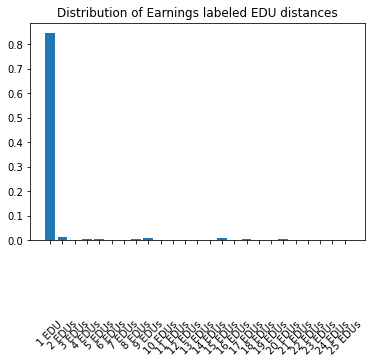

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(*zip(*percentage_dict.items()))
#plt.hist(x =list(percentage_dict.values()) , bins= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

ax1 = plt.subplot()
ax1.tick_params(axis='x', which='major', pad=75)
ax1.set_xticklabels(["1 EDU","2 EDUs","3 EDUs","4 EDUs", "5 EDUs","6 EDUs","7 EDUs","8 EDUs","9 EDUs","10 EDUs","11 EDUs","12 EDUs","13 EDUs","14 EDUs", "15 EDUs","16 EDUs","17 EDUs", "18 EDUs","19 EDUs","20 EDUs","21 EDUs","22 EDUs","23 EDUs","24 EDUs","25 EDUs"], rotation=45)
#plt.xticks(ticks=np.arange(min(percentage_dict.values()), max(percentage_dict.values())+2, 10.0))
plt.title(label="Distribution of Earnings labeled EDU distances", fontdict=None, loc='center', pad=None)
plt.show()

{'equal_to_one': 0.7700650759219089, 'more_than_1': 0.2299349240780911, 'more_than_3': 0.20715835140997832, 'more_than_5': 0.18655097613882862, 'more_than_10': 0.12472885032537961, 'more_than_15': 0.07266811279826464, 'more_than_20': 0.04772234273318872}
[0.7700650759219089, 0.2299349240780911, 0.20715835140997832, 0.18655097613882862, 0.12472885032537961, 0.07266811279826464, 0.04772234273318872]


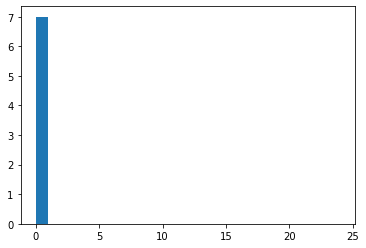

In [ ]:
all_pubmed_sub_df["equal_to_1"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] == 1]) / len(all_pubmed_sub_df["edu_distance"])
all_pubmed_sub_df["more_than_1"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 1]) / len(all_pubmed_sub_df["edu_distance"])
all_pubmed_sub_df["more_than_3"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 3]) / len(all_pubmed_sub_df["edu_distance"])
all_pubmed_sub_df["more_than_5"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 5]) / len(all_pubmed_sub_df["edu_distance"])
all_pubmed_sub_df["more_than_10"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 10]) / len(all_pubmed_sub_df["edu_distance"])
all_pubmed_sub_df["more_than_15"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 15]) / len(all_pubmed_sub_df["edu_distance"])
all_pubmed_sub_df["more_than_20"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 20]) / len(all_pubmed_sub_df["edu_distance"])
all_pubmed_sub_df["equal_to_1"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] == 1]) / len(all_pubmed_sub_df["edu_distance"])


#people_dict = {'bob': 'boy', 'Mike': 'boy', 
           #'Katie': 'girl', 'Stacey': 'girl'}  
#df['people'] = people_dict


percentage_dict = {"equal_to_one": all_pubmed_sub_df["equal_to_1"].iloc[0],
                   "more_than_1": all_pubmed_sub_df["more_than_1"].iloc[0],
                   "more_than_3":all_pubmed_sub_df["more_than_3"].iloc[0],
                   "more_than_5":all_pubmed_sub_df["more_than_5"].iloc[0],
                   "more_than_10":all_pubmed_sub_df["more_than_10"].iloc[0], 
                   "more_than_15":all_pubmed_sub_df["more_than_15"].iloc[0],
                   "more_than_20":all_pubmed_sub_df["more_than_20"].iloc[0], 
}

#print(all_pubmed_sub_df["equal_to_1"].iloc[0])

print(percentage_dict)

print(list(percentage_dict.values()))

x = list(percentage_dict.values())

plt.hist(x,bins = [i for i in range(25)])
plt.show()

[0.8461538461538461, 0.01201923076923077, 0.002403846153846154, 0.004807692307692308, 0.004807692307692308, 0.002403846153846154, 0.0, 0.004807692307692308, 0.007211538461538462, 0.0, 0.002403846153846154, 0.0, 0.0, 0.0, 0.009615384615384616, 0.0, 0.004807692307692308, 0.0, 0.002403846153846154, 0.004807692307692308, 0.002403846153846154, 0.0, 0.0, 0.002403846153846154, 0.002403846153846154]


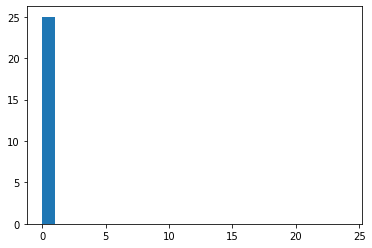

In [ ]:
percentage_dict = {"equal_to_one_EDU": all_earnings_sub_df["equal_to_1"].iloc[0],
                   "two_edus": all_earnings_sub_df["equal_to_2"].iloc[0],
                   "three_edus": all_earnings_sub_df["equal_to_3"].iloc[0],
                   "four_edus": all_earnings_sub_df["equal_to_4"].iloc[0],
                   "five_edus": all_earnings_sub_df["equal_to_5"].iloc[0],
                   "six_edus": all_earnings_sub_df["equal_to_6"].iloc[0],
                   "seven_edus": all_earnings_sub_df["equal_to_7"].iloc[0],
                   "eight_edus": all_earnings_sub_df["equal_to_8"].iloc[0],
                   "nine_edus": all_earnings_sub_df["equal_to_9"].iloc[0],
                   "ten_edus": all_earnings_sub_df["equal_to_10"].iloc[0],
                   "eleven_edus": all_earnings_sub_df["equal_to_11"].iloc[0],
                   "twelve_edus": all_earnings_sub_df["equal_to_12"].iloc[0],
                   "thirteen_edus": all_earnings_sub_df["equal_to_13"].iloc[0],
                   "fourteen_edus": all_earnings_sub_df["equal_to_14"].iloc[0],
                   "fifteen_edus": all_earnings_sub_df["equal_to_15"].iloc[0],
                   "sixteen_edus": all_earnings_sub_df["equal_to_16"].iloc[0],
                   "seventeen_edus": all_earnings_sub_df["equal_to_17"].iloc[0],
                   "eighteen_edus": all_earnings_sub_df["equal_to_18"].iloc[0],
                   "nineteen_edus": all_earnings_sub_df["equal_to_19"].iloc[0],
                   "twenty_edus": all_earnings_sub_df["equal_to_20"].iloc[0],
                   "twenty_one_edus": all_earnings_sub_df["equal_to_21"].iloc[0],
                   "twenty_two_edus": all_earnings_sub_df["equal_to_22"].iloc[0],
                   "twenty_three_edus": all_earnings_sub_df["equal_to_23"].iloc[0],
                   "twenty_four_edus": all_earnings_sub_df["equal_to_24"].iloc[0],
                   "twenty_five_edus": all_earnings_sub_df["equal_to_25"].iloc[0],

                    
}

print(list(percentage_dict.values()))

x = list(percentage_dict.values())

plt.hist(x,bins = [i for i in range(25)])
plt.show()



In [ ]:
#D = {u'Label1':26, u'Label2': 17, u'Label3':30}
import numpy as np
plt.bar(*zip(*percentage_dict.items()))
ax1 = plt.subplot()
ax1.set_xticklabels(["=1",">1",">3",">5",">10",">15",">20"], rotation=45)
#plt.xticks(ticks=np.arange(min(percentage_dict.values()), max(percentage_dict.values())+2, 10.0))
plt.title(label="Distribution of Pubmed labeled EDU distances", fontdict=None, loc='center', pad=None)
plt.show()


NameError: ignored

In [ ]:
all_pubmed_sub_df["equal_to_1"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] == 1]) / len(all_pubmed_sub_df["edu_distance"])
all_pubmed_sub_df["more_than_1"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 1]) / len(all_pubmed_sub_df["edu_distance"])
all_pubmed_sub_df["more_than_3"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 3]) / len(all_pubmed_sub_df["edu_distance"])
all_pubmed_sub_df["more_than_5"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 5]) / len(all_pubmed_sub_df["edu_distance"])
all_pubmed_sub_df["more_than_10"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 10]) / len(all_pubmed_sub_df["edu_distance"])
all_pubmed_sub_df["more_than_15"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 15]) / len(all_pubmed_sub_df["edu_distance"])
all_pubmed_sub_df["more_than_20"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 20]) / len(all_pubmed_sub_df["edu_distance"])
all_pubmed_sub_df["equal_to_1"] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] == 1]) / len(all_pubmed_sub_df["edu_distance"])


#people_dict = {'bob': 'boy', 'Mike': 'boy', 
           #'Katie': 'girl', 'Stacey': 'girl'}  
#df['people'] = people_dict


percentage_dict = {"equal_to_one": all_pubmed_sub_df["equal_to_1"].iloc[0],
                   "more_than_1": all_pubmed_sub_df["more_than_1"].iloc[0],
                   "more_than_3":all_pubmed_sub_df["more_than_3"].iloc[0],
                   "more_than_5":all_pubmed_sub_df["more_than_5"].iloc[0],
                   "more_than_10":all_pubmed_sub_df["more_than_10"].iloc[0], 
                   "more_than_15":all_pubmed_sub_df["more_than_15"].iloc[0],
                   "more_than_20":all_pubmed_sub_df["more_than_20"].iloc[0], 
}

#print(all_pubmed_sub_df["equal_to_1"].iloc[0])

print(percentage_dict)

print(list(percentage_dict.values()))



In [ ]:
#df.plot(x="X", y=["A", "B", "C"], kind="bar")

In [ ]:
df = pd.DataFrame(data=all_pubmed_sub_df,
              columns=['more_than_1', 'more_than_3', 'more_than_5', 'more_than_10', 'more_than_15','more_than_20','Total_distance'],
             index = ['ITEM1', 'ITEM2', 'ITEM3', 'ITEM4', 'ITEM5'])
df['percent_more_than_1'] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 1]) / len(all_pubmed_sub_df["edu_distance"]) * 100
df['percent_more_than_3'] = len(all_pubmed_sub_df[all_pubmed_sub_df["edu_distance"] > 3]) / len(all_pubmed_sub_df["edu_distance"]) * 100
df[['percent_more_than_1', 'percent_more_than_3']].plot(kind='bar')

In [ ]:
df = pd.DataFrame(data=all_pubmed_sub_df,
              columns=['A', 'B', 'Total'],
             index = ['ITEM1', 'ITEM2', 'ITEM3', 'ITEM4', 'ITEM5'])
df['percA'] = df['A']/df['Total']*100
df['percB'] = df['B']/df['Total']*100
df[['percA', 'percB']].plot(kind='bar')

In [ ]:
#!/usr/bin/env python
import xmltodict
import datasets
from datasets import Dataset, concatenate_datasets
import glob
import pandas as pd
import re
import transformers 



dataframe_list = []
for file in glob.glob("/content/drive/MyDrive/original_pubmed/*.xml"):
  #print(file)
  with open(file, 'r', encoding='utf-8') as file: #'pubmed_1_copy.xml'
      my_xml = file.read()
      clean_xml = re.sub("[&;]","",my_xml)
      xml_dict = xmltodict.parse(my_xml)
      df1 = pd.DataFrame(xml_dict, columns=xml_dict.keys())
      order_dict = df1["rst"].iloc[0]
      segments_list_of_dicts = order_dict["segment"]
      xml_dataframe = pd.DataFrame.from_dict(segments_list_of_dicts, orient='columns')
      selected_df = xml_dataframe[~xml_dataframe.isnull().any(axis=1)] #removes null
      selected_df.sort_values(by='@id',ascending=True)
      df_formatted = selected_df.assign(parent_text=selected_df["#text"].shift(1))
      df_formatted["parent_text"].fillna(value=df_formatted.iloc[0]["#text"],inplace=True) #fillna parent
      dataframe_list.append(df_formatted)
      #df_formatted["parent_text"].fillna(value="Introduction",inplace=True) #fillna parent
      dataframe_list.append(df_formatted)
      all_pubmed_sub_df = pd.concat(dataframe_list)

#print(all_earnings_df.head(15))
print(len(all_pubmed_sub_df))

1844


In [ ]:
import pandas as pd
#l = ['michael','michael','alice','carter']
#pd.Series(l).astype('category').cat.codes.values

rel_labels = list(all_pubmed_sub_df["@relname"])
rel_2_int = pd.Series(rel_labels).astype('category').cat.codes.values
print(rel_2_int)
for val in rel_2_int:
  print(val)
#print(len(set(rel_2_int)))

In [ ]:
#hr_df['candidates'] = candidates
import torch
all_pubmed_sub_df["int_relation"] = rel_2_int.astype(float)
all_pubmed_sub_df["int_relation"] = torch.Tensor.long(torch.Tensor(rel_2_int))
all_pubmed_sub_df.head(5)

In [ ]:
import datasets 
from datasets import Dataset
data_to_dset = all_pubmed_sub_df[["#text","parent_text","int_relation"]]

raw_datasets = Dataset.from_pandas(data_to_dset)


In [ ]:
raw_datasets.rename_column("#text","text")
raw_datasets.train_test_split(test_size=0.2)

print(raw_datasets["#text"])

['Background: Neoadjuvant chemotherapy', 'and radiation', 'followed by surgical resection', 'of the rectum', 'is a standard treatment', 'for locally advanced rectal cancer.', 'A subset of rectal cancer is caused', 'by a deficiency in mismatch repair.', 'is responsive to programmed death 1', '(PD-1)', 'blockade in the context of metastatic disease,', 'it was hypothesized', 'that checkpoint blockade could be effective in patients', 'with mismatch repair-deficient,', 'locally advanced rectal cancer.', 'Methods: We initiated a prospective phase 2 study', 'an anti-PD-1 monoclonal antibody,', 'was administered', 'every 3 weeks for 6 months', 'in patients with mismatch repair-deficient stage II', 'This treatment was to be followed', 'by standard chemoradiotherapy', 'Patients who had a clinical complete response', 'after completion of dostarlimab therapy would proceed', '12 months after completion of dostarlimab therapy', 'or pathological complete response', 'after completion of dostarlimab th

In [ ]:
!pip3 install torch==1.6
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer,DataCollatorWithPadding
bio_model = "dmis-lab/biobert-v1.1"
scibert = "allenai/scibert_scivocab_uncased"
#roberta_model = "roberta-base"
#scibert_tokenizer = AutoModelForSequenceClassification.from_pretrained(scibert,num_labels=len(set(all_earnings_sub_df["int_relation"])))
scibert_tokenizer = AutoTokenizer.from_pretrained(scibert,add_prefix_space=True, use_fast=False)

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/228k [00:00<?, ?B/s]

In [ ]:
def tokenize_function(example):
    return scibert_tokenizer(example["#text"], example["parent_text"], truncation=True)

#this is the sentence pair tokenization ^^ 
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=scibert_tokenizer)

#print(tokenized_datasets["input_ids"])

#input_ids = bio_tokenizer(sentence,truncation=True, add_special_tokens=True,max_length=512)['input_ids']

wordpieces = [scibert_tokenizer.decode(input_id) for input_id in tokenized_datasets["input_ids"]]
print(wordpieces)

  0%|          | 0/2 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


['[CLS] background : neoadjuvant chemotherapy [SEP] background : neoadjuvant chemotherapy [SEP]', '[CLS] and radiation [SEP] background : neoadjuvant chemotherapy [SEP]', '[CLS] followed by surgical resection [SEP] and radiation [SEP]', '[CLS] of the rectum [SEP] followed by surgical resection [SEP]', '[CLS] is a standard treatment [SEP] of the rectum [SEP]', '[CLS] for locally advanced rectal cancer. [SEP] is a standard treatment [SEP]', '[CLS] a subset of rectal cancer is caused [SEP] for locally advanced rectal cancer. [SEP]', '[CLS] by a deficiency in mismatch repair. [SEP] a subset of rectal cancer is caused [SEP]', '[CLS] is responsive to programmed death 1 [SEP] by a deficiency in mismatch repair. [SEP]', '[CLS] ( pd - 1 ) [SEP] is responsive to programmed death 1 [SEP]', '[CLS] blockade in the context of metastatic disease, [SEP] ( pd - 1 ) [SEP]', '[CLS] it was hypothesized [SEP] blockade in the context of metastatic disease, [SEP]', '[CLS] that checkpoint blockade could be ef

In [ ]:
tokenized_datasets.column_names
tokenized_datasets.set_format("torch")

In [ ]:
tokenized_datasets = tokenized_datasets.remove_columns(["#text", "parent_text", "__index_level_0__"])
tokenized_datasets = tokenized_datasets.rename_column("int_relation", "labels")
tokenized_datasets.set_format("torch")
tokenized_datasets.column_names
tokenized_datasets


Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1844
})

In [ ]:
tokenized_datasets

Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1844
})

In [ ]:
tokenized_datasets = tokenized_datasets.train_test_split()

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    tokenized_datasets["train"], shuffle=True, batch_size=64, collate_fn=data_collator
)
eval_dataloader = DataLoader(
    tokenized_datasets["test"], batch_size=64, collate_fn=data_collator
)

In [ ]:
for batch in train_dataloader:
    break
{k: v.shape for k, v in batch.items()}

{'labels': torch.Size([64]),
 'input_ids': torch.Size([64, 50]),
 'token_type_ids': torch.Size([64, 50]),
 'attention_mask': torch.Size([64, 50])}

In [ ]:
train_dataloader

In [ ]:
from transformers import AutoConfig
config = AutoConfig #.from_pretrained("bert-base-cased")
config.classifier_dropout = 0.3

config._num_labels=22
config.num_hidden_layers=24
config._name_or_path = "allenai/scibert-base-uncased"
config.vocab_size = 30000

In [ ]:
from transformers import AutoModelForSequenceClassification
#mma_model = myModelAgain("allenai/scibert_scivocab_uncased",config=confignum_classes=22)
sci_bert_new_configs = AutoModelForSequenceClassification.from_pretrained("allenai/scibert_scivocab_uncased",config=config)

Downloading:   0%|          | 0.00/442M [00:00<?, ?B/s]

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification we

In [ ]:
from transformers import AutoModel

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:

import torch 
import torch.nn as nn
from transformers import AutoModel

#model = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased")


#criterion = torch.nn.CrossEntropyLoss().to(device)

class ScienceClassifier(nn.Module):
  def __init__(self):
    super(ScienceClassifier, self).__init__()
    self.AutoModel = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased")
    self.drop0 = nn.Dropout(0.25)
    self.linear1 = nn.Linear(64*53, 512)
    self.relu1 = nn.ReLU()
    self.drop1 = nn.Dropout(0.25)
    self.linear2 = nn.Linear(512, 22)
    self.relu2 = nn.ReLU()

  def forward(self, input_ids, attention_mask):
    outputs = self.AutoModel(input_ids, attention_mask)
    last_hidden_state = outputs[0]
    pooled_output = torch.cat(tuple([last_hidden_state[:, i] for i in [-4, -3, -2, -1]]), dim=-1)
    x = self.drop0(pooled_output)
    x = self.relu1(self.linear1(x))
    x = self.drop1(x)
    x = self.relu2(self.linear2(x))
    return x

In [ ]:
#RuntimeError: size mismatch, m1: [16 x 3072], m2: [768 x 512] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:41

In [ ]:
import torch.nn as nn
class NewScienceClassifier(nn.Module):
  def __init__(self):
    super(NewScienceClassifier, self).__init__()
    self.AutoModel = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased")
    self.drop0 = nn.Dropout(0.25)
    self.linear1 = nn.Linear(3072,512) #512 * 6 = 3072
    
    self.relu1 = nn.ReLU()
    #self.drop1 = nn.Dropout(0.25)
    self.drop1 = nn.Dropout(0.45)
    self.linear2 = nn.Linear(512,22)
    self.relu2 = nn.ReLU()


  def forward(self, input_ids, attention_mask):
    outputs = self.AutoModel(input_ids, attention_mask)
    last_hidden_state = outputs[0]
    pooled_output = torch.cat(tuple([last_hidden_state[:, i] for i in [-4, -3, -2, -1]]), dim=-1)
    x = self.drop0(pooled_output)
    x = self.relu1(self.linear1(x))
    x = self.drop1(x)
    x = self.relu2(self.linear2(x))
    return x

In [ ]:
model = ScienceClassifier()

In [ ]:
new_model = NewScienceClassifier()

In [ ]:
from tqdm.auto import tqdm 
from torch.optim import AdamW


optim = AdamW(new_model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

def compute_accuracy(y_pred, y_target):
    _, y_pred_indices = y_pred.max(dim=1)
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    accuracy = (n_correct / len(y_pred_indices)) * 100
    return accuracy

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from tqdm.auto import tqdm 
from torch.optim import AdamW

optim = AdamW(new_model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()
num_training_steps = 60
progress_bar = tqdm(range(num_training_steps))
print(criterion)
new_model.to(device)
new_model.train()
running_acc = 0.
epoch = 1000
for i in range(epoch):
  for batch in train_dataloader:
      optim.zero_grad()
      #input_ids = input_ids.view(16,-1)
      input_ids = batch['input_ids'].to(device)
      #attention_mask = attention_mask.view(16,-1)
      attention_mask = batch['attention_mask'].to(device)
      
      labels = batch['labels'].to(device)
      #active_labels = labels.view(64, -1)
      #print(labels)
      #print(labels)
      print(input_ids.shape)
      outputs = new_model(input_ids, attention_mask)
      print(outputs)
      loss = criterion(outputs, labels) # ERROR
      #print(loss)

      loss.backward()
      optim.step()
      acc_t = compute_accuracy(outputs,labels)
      print("acc_t: ",acc_t)
      running_acc += (acc_t - running_acc) / (epoch + 1)
      print("acc: ", running_acc)
      #print(running_acc)
      progress_bar.update(1)


In [ ]:
from tqdm.auto import tqdm 
from torch.optim import AdamW

optim = AdamW(new_model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()
num_training_steps = 60
progress_bar = tqdm(range(num_training_steps))
print(criterion)
new_model.to(device)
new_model.train()
running_acc = 0.
epoch = 1000
for i in range(epoch):
  for batch in eval_dataloader:
      optim.zero_grad()
      #input_ids = input_ids.view(16,-1)
      input_ids = batch['input_ids'].to(device)
      #attention_mask = attention_mask.view(16,-1)
      attention_mask = batch['attention_mask'].to(device)
      
      labels = batch['labels'].to(device)
      #active_labels = labels.view(64, -1)
      #print(labels)
      #print(labels)
      print(input_ids.shape)
      outputs = new_model(input_ids, attention_mask)
      print(outputs)
      loss = criterion(outputs, labels) # ERROR
      #print(loss)

      loss.backward()
      optim.step()
      acc_t = compute_accuracy(outputs,labels)
      print("acc_t: ",acc_t)
      running_acc += (acc_t - running_acc) / (epoch + 1)
      print("acc: ", running_acc)
      #print(running_acc)
      progress_bar.update(1)


  0%|          | 0/60 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
acc_t:  100.0
acc:  99.74624070163985
torch.Size([64, 48])
tensor([[12.2105,  0.0000,  0.0000,  ...,  0.0803,  0.0000,  0.0000],
        [ 1.6135,  0.0000,  0.0000,  ...,  0.0000,  0.7464,  0.0000],
        [ 0.0000,  0.0000, 13.5383,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.8136,  0.0000,  1.4163,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 11.4077,  0.0000],
        [ 0.6766,  0.0000,  0.0000,  ...,  0.0000,  0.0206,  0.0000]],
       device='cuda:0', grad_fn=<ReluBackward0>)
acc_t:  100.0
acc:  99.74649420743242
torch.Size([64, 54])
tensor([[ 0.0000,  0.0000,  2.8493,  ...,  0.0000,  0.0000, 13.5794],
        [ 0.0000,  0.0000,  0.3249,  ...,  0.0000,  1.6899,  1.0990],
        [ 0.0000,  0.0000,  0.6460,  ...,  0.0000,  0.0000, 13.2836],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.5501, 14.9105],
        [ 0.0000,  0.0000,  0.2070,  ...,  0.0000,  0.0

In [ ]:
outputs = new_model(**batch)
print(outputs.loss, outputs.logits.shape)

TypeError: ignored